# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import random

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms

from torchsummary import summary
from tqdm import tqdm

In [4]:
from Modules.data import tiny_image_net_folder_loader
from Modules.models.resnet import ResNet18 as Net 

#from Modules.models.torchvision_resnet import Net

from Modules.train.train_eval import train, test
from Modules.utility import visulization
from Modules.grad_cam.gradcam import GradCAM, GradCAMpp
from Modules.grad_cam.utility import visualize_cam

# Data loader

In [5]:
my_args = {'pin_memory' : False, 'num_workers': 1}
train_loader, test_loader = tiny_image_net_folder_loader.get_dataloder(args=my_args)

In [6]:
it = iter(train_loader)

In [7]:
images, labels = it.next()

In [8]:
images.size()

torch.Size([32, 3, 64, 64])

In [9]:
idx_to_class = {train_loader.dataset.class_to_idx[x] : x for x in train_loader.dataset.class_to_idx}

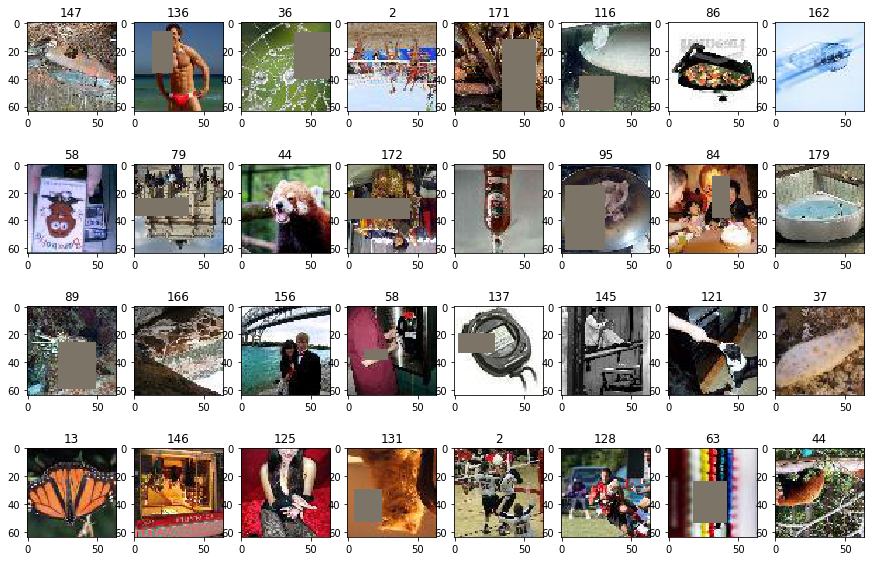

In [10]:
visulization.display_images(images, labels, idx_to_class)

# Network

In [11]:
from torch.nn import functional as F

In [12]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

In [14]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

total_epochs = 50
for i in range(total_epochs):
    train(model, device, train_loader, optimizer, i, train_losses, train_acc)
    test(model, device, test_loader,  test_losses, test_acc)

  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  9.360606060606061


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  16.045454545454547


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  22.66060606060606


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  26.724242424242423


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  30.248484848484846


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  34.69090909090909


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  35.669696969696965


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  37.36060606060606


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  39.31515151515151


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  41.08787878787879


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  42.484848484848484


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  43.81515151515151


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  42.836363636363636


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  46.057575757575755


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  45.721212121212126


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  46.56363636363636


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  48.17272727272727


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  47.61515151515152


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  48.57878787878788


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.04545454545455


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  47.78181818181818


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.13333333333333


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  50.227272727272734


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.2


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.518181818181816


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.46363636363637


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.7


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.309090909090905


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.027272727272724


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.912121212121214


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.31212121212121


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.2939393939394


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.56363636363636


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  48.987878787878785


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.403030303030306


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.78787878787879


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.7030303030303


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.57878787878788


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.03636363636364


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.49090909090909


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.766666666666666


  0%|          | 0/2407 [00:00<?, ?it/s]

Acc :  49.7030303030303


49 loss : 0.5303736925125122 acc : 0.875: 100%|██████████| 2407/2407 [03:01<00:00, 14.64it/s]   


Acc :  49.99696969696969


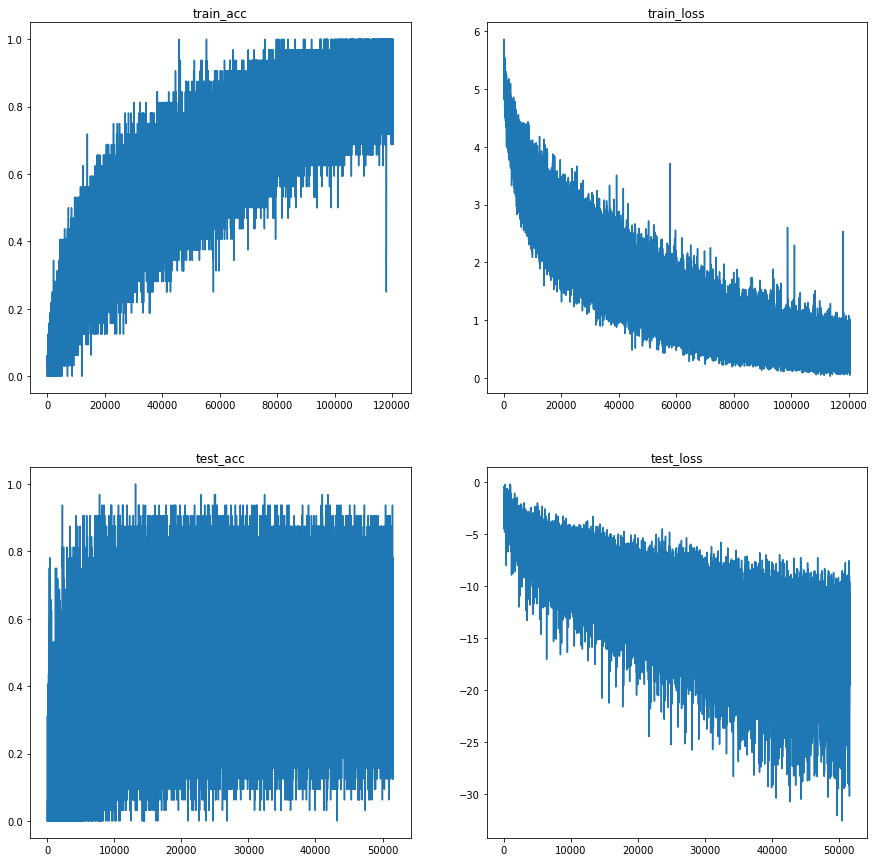

In [15]:
visulization.display_graphs(train_losses, test_losses, train_acc, test_acc)